In [87]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

df = pd.read_csv("../Multi-Agent/data/train.csv")
df_val = pd.read_csv('../Multi-Agent/data/validation.csv')

In [2]:
df.head(n=3)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"


# import the p_CTR

In [3]:
# load the dataset
df_LR=pd.read_csv('pred_lr2.csv')
p_CTR = pd.Series(df_LR.iloc[:,1])

In [4]:
print(p_CTR.shape)
print("Predicted Click Through Rate")
print('----------------------------------------------------------')
p_CTR.head(n=5).T

(303925,)
Predicted Click Through Rate
----------------------------------------------------------


0    0.000225
1    0.000129
2    0.000096
3    0.000076
4    0.000093
Name: pre_click, dtype: float64

In [5]:
print(df_val[df_val.click == 1].shape)
print(df_val[df_val.click == 0].shape)
df_val[df_val.click == 1].head(n=3)

p_CTR = pd.Series(df_LR.iloc[:,1])

(202, 25)
(303723, 25)


In [86]:
# all bids you have won if base bid equals to 70
bid_base = 60
print(df_val[df_val.payprice < bid_base].shape)
df_val[df_val.payprice < bid_base].head(n=10)

(138836, 25)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,trqRTvFRLpscFU,5ede68cc7542a34777fb8a1574856b6f,NaN,mm_10027070_2459574_9659312,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,trqRTvdJMoFoFoc4JKn,40c388f45dbc0e1fc53a8c6c81305de5,NaN,3481684581,336,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,tKFJeun0BouoXOl4JKTI,fcf53e0e5f09aa8d7e1c9d986cea321,NaN,1120607322,200,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"
5,0,6,1,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,5d3f7a140423324201f980609348422b7b9d2ba8,windows_ie,101.23.72.*,3,3,3.0,5KKFB19rg5scFsf,cf5d45e408ea2b18576f42a4be3865a,NaN,Lady_Width3,960,90,0,0,20,3d8f1161832704a1a34e1ccdda11a81e,241,22,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10111"
6,0,0,18,786a2940f225482dc04d455dc7a7fea436b02e03,d29c0eb9c94d4225736a15324000b9424518abad,windows_ie,183.131.142.*,94,97,1.0,trqRTJjrXqf7FmMs,f3888d3e83f0c4f0b916af53191d8164,NaN,mm_13991432_2298120_9467354,336,280,0,1,0,13606a7c541dcd9ca1948875a760bb31,227,31,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10110"
7,0,6,21,17ada861c6ed0616f88312ba0d3d76c0f95b4940,1c2afa6805a0987cd98be4212fcde0f43ea2bdaa,windows_ie,116.252.192.*,238,239,1.0,trqRTummPvas1m58uG,b639cdf96befe9ba75f8962e2c58d3bf,NaN,mm_10058411_2865562_9929053,300,250,2,1,0,00fccc64a1ee2809348509b7ac2a97a5,227,20,b2e35064f3549d447edbbdfb1f707c8c,3427,NaN
8,0,0,11,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,391c06ba8398e249d5c6e370a0ea9d1245ae9b29,windows_chrome,114.226.234.*,80,84,2.0,trqRTuSJBqMIXdd85SqfNX,eedd657004ccb6d9e3e471d456ed40c7,NaN,4056663416,336,280,2,0,5,f65c8bdb41e9015970bac52baa813239,249,58,9be83422522025c09a44593ecd1af8ca,3476,"10057,10063,10006,10059,10110"
9,0,5,15,442ffca310e325abc255e8ff97d9812051336acd,e7b2e7f694f4fe57a467fc3879ce4562c797edb4,windows_ie,222.172.73.*,65,73,3.0,31xSTvprdN1RFt,575787118f246d690223fd5a3ffdc710,NaN,ALLINONE_F_Width2,1000,90,0,0,50,a10c31a8ff5f42930b4c34035e523886,241,55,d29e59bf0f7f8243858b8183f14d4412,3358,"10048,10059,10006,13403,10063,10031,10111"
11,0,6,17,f073b222522a086278c6e52ac0e4012dd797baea,64b2759165b7f538c56df8c1032a99175df77d8a,windows_chrome,60.210.153.*,146,153,3.0,31xSTvprdN1RFt,5434457605945bebd310163f25feaf56,NaN,Ent_F_Upright,300,250,0,0,50,00fccc64a1ee2809348509b7ac2a97a5,241,55,b2e35064f3549d447edbbdfb1f707c8c,3427,"13776,10057,10075,10006,10063,10111"
12,0,5,13,8d3c0aa9cf1d9266f686a3ae0efa937ea0f7db3b,bb5914fb0d307d0da7477541c7a813a288252f81,windows_ie,61.183.129.*,183,184,2.0,DFpETuFygZl7gspy,78b0ea25d3498e83901656ea74090f23,NaN,3721625973,250,250,2,0,39,798b2d49952d77f1eace9f23c210d0b5,238,49,0f951a030abdaedd733ee8d114ce2944,3427,"10083,10110"


# The Optimal Real-Time bidding strategy

In [7]:
# ORTB Bidding Function on validation set:
# ORTB = *√ c / λ x θ + c^2 − c
c_scope = np.arange(1,16,1)
lam_scope = [1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5.2e-7,1e-6,5e-6,
             1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]

ortb_bids = []
parameters = []

for c in c_range:
    for lam in lam_scope:
        parameters.append((c,lam))
        inner_eq = (c / lam * np.asarray(p_CTR)) + c**2 - c
        ortbbid = np.sqrt(inner_eq)
        ortb_bids.append(ortbbid.tolist())

In [12]:
print("The length of the parameters is:", len(parameters)) #20*15
print("The length of the ortb_bids is:", len(ortb_bids))

The length of the parameters is: 400
The length of the ortb_bids is: 400


In [13]:
import time 
def ORTB_bidding(bids_won):
    impressions = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    bids_won >= df_val.payprice
    for i in range(0, len(bids_won)):
            if bids_won[i] == True:
                impressions = impressions + 1.0
                clicks = clicks + df_val.click[i]
                cost = cost + df_val.payprice[i]
                print('the bid is Over-budget')
            if cost >= budget:
                    print('the bid is Within-budget')
                break
    return impressions, clicks, cost

In [14]:
ortb = pd.DataFrame()
ortb['c,lambda'] = parameters

imps = []
clicks = []
cost = []

starttime = time.time()
print("Starting ORTB Bidding...")

for bid in ortb_bids:
    [im, clks, ct] = ORTB_bidding(bid)
    imps.append(im)
    clicks.append(clks)
    cost.append(ct)
    
# impression can't be a float
ortb['impression'] = imps
ortb.impression = ortb.impression.astype(int)
ortb['cost'] = cost
ortb['clicks'] = clicks
ortb['CTR'] = (ortb.clicks/ortb.impression * 100).round(4).astype(str) # keep 4 demicial
ortb['CPM'] = (ortb.cost/ortb.impression * 1000).round(2).astype(str) # keep 2 demicial
ortb['CPC'] = (ortb.cost/ortb.clicks).round(2).astype(str) # keep 2 demicial

print("ORTB Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Starting ORTB Bidding...
ORTB Bidding Finished in 26.13 minutes


C:\Users\BigD\Anaconda4\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [15]:
# Best ortb bid on click metric
ortb.iloc[np.where (ortb.clicks == ortb.clicks.max())[0]]

,"c,lambda",impression,cost,clicks,CTR,CPM,CPC
107,"(6, 5.2e-07)",142792.0,5859228.0,147,0.1029,41033.31,39858.69
228,"(12, 1e-06)",147606.0,6138730.0,147,0.0996,41588.62,41760.07


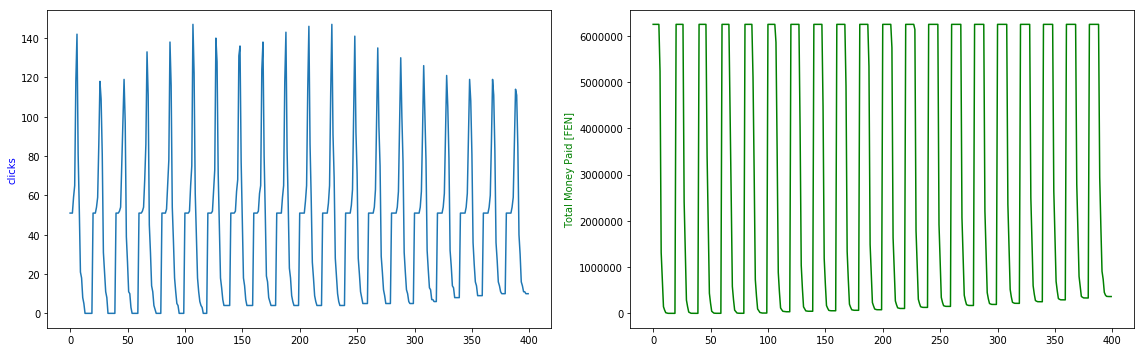

In [88]:
m = ortb[['clicks']]
n = ortb[['cost']]

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.plot(m.clicks)
ax.set_ylabel('clicks', color='b')

ax1 = axs[1]
ax1.plot(n.cost,color='g')
ax1.set_ylabel('Total Money Paid [FEN]', color='g')
fig.set_size_inches(16, 5)
fig.tight_layout()
fig.savefig('ortbbid.PNG', dpi=200)
plt.show()

# Anaysis of bidding strategy

In [83]:
# add a column name
ortb_best = pd.DataFrame(ortb.iloc[[107, 228]]).T.drop('c,lambda')
ortb_best = ortb_best.T
ortb_best.columns.name = 'ortb_bid'

print(ortb_best)

ortb_bid,impression,cost,clicks,CTR,CPM,CPC
107,142792,5.85923e+06,147,0.1029,41033.31,39858.69
228,147606,6.13873e+06,147,0.0996,41588.62,41760.07


In [84]:
ortb_best.T.to_latex()

'\\begin{tabular}{lll}\n\\toprule\n{} &          107 &          228 \\\\\nortb\\_bid   &              &              \\\\\n\\midrule\nimpression &       142792 &       147606 \\\\\ncost       &  5.85923e+06 &  6.13873e+06 \\\\\nclicks     &          147 &          147 \\\\\nCTR        &       0.1029 &       0.0996 \\\\\nCPM        &     41033.31 &     41588.62 \\\\\nCPC        &     39858.69 &     41760.07 \\\\\n\\bottomrule\n\\end{tabular}\n'